<a href="https://colab.research.google.com/github/jenius13/Practice/blob/master/ch2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

NUM_CLASSES=10

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [0]:
import warnings

warnings.filterwarnings(action='ignore')


In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential([
                  Dense(200,activation='relu',input_shape=(32,32,3)),
                  Flatten(),
                  Dense(100,activation='relu'),
                  Dense(10,activation='softmax')
]
    
)

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 200)       800       
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20480100  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 20,481,910
Trainable params: 20,481,910
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [7]:
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





50000/50000 [==============================] - 43s 859us/step - loss: 1.7181 - acc: 0.4299
Epoch 2/10
50000/50000 [==============================] - 33s 660us/step - loss: 1.4174 - acc: 0.5016
Epoch 3/10
50000/50000 [==============================] - 33s 656us/step - loss: 1.3328 - acc: 0.5318
Epoch 4/10
50000/50000 [==============================] - 33s 658us/step - loss: 1.2740 - acc: 0.5507
Epoch 5/10
50000/50000 [==============================] - 33s 655us/step - loss: 1.2195 - acc: 0.5709
Epoch 6/10
50000/50000 [==============================] - 33s 655us/step - loss: 1.1655 - acc: 0.5900
Epoch 7/10
50000/50000 [==============================] - 33s 657us/step - loss: 1.1112 - acc: 0.6091
Epoch 8/10
50000/50000 [==============================] - 33s 655us/step - loss: 1.0603 - acc: 0.6288
Epoch 9/10
50000/50000 [==============================] - 33s 653us/step - loss: 1

In [8]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 119us/step


[1.5107338954925538, 0.5114]

In [0]:
CLASSES=np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds=model.predict(x_test)
pred_single=CLASSES[np.argmax(preds,axis=-1)]
actual_single=CLASSES[np.argmax(y_test,axis=-1)]

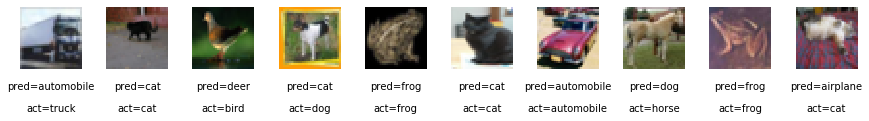

In [17]:
import matplotlib.pyplot as plt

n_to_show=10
indices=np.random.choice(range(len(x_test)),n_to_show)

fig=plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
  img=x_test[idx]
  ax=fig.add_subplot(1,n_to_show,i+1)
  ax.axis('off')
  ax.text(0.5,-0.35,'pred='+str(pred_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.text(0.5,-0.7,'act='+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.imshow(img)


In [29]:

import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10


input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 16, 16, 32)        0   

In [0]:

model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['acc'])

In [31]:
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 472us/step - loss: 1.8190 - acc: 0.3772 - val_loss: 1.3437 - val_acc: 0.5183
Epoch 2/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.4380 - acc: 0.4910 - val_loss: 1.2006 - val_acc: 0.5730
Epoch 3/10
50000/50000 [==============================] - 17s 338us/step - loss: 1.2717 - acc: 0.5488 - val_loss: 1.1357 - val_acc: 0.5934
Epoch 4/10
50000/50000 [==============================] - 17s 347us/step - loss: 1.1614 - acc: 0.5909 - val_loss: 1.0695 - val_acc: 0.6210
Epoch 5/10
50000/50000 [==============================] - 17s 339us/step - loss: 1.0741 - acc: 0.6204 - val_loss: 1.0729 - val_acc: 0.6165
Epoch 6/10
50000/50000 [==============================] - 17s 338us/step - loss: 1.0084 - acc: 0.6462 - val_loss: 1.0095 - val_acc: 0.6409
Epoch 7/10
50000/50000 [==============================] - 17s 334us/step - loss: 0.9541 - acc: 0.6644 - val_loss: 0.

10000/10000 [==============================] - 1s 68us/step


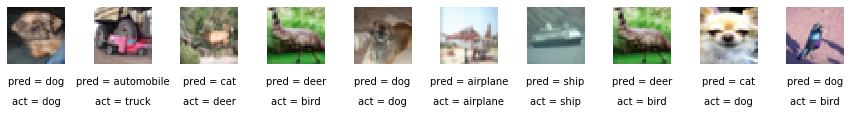

In [32]:
model.evaluate(x_test, y_test, batch_size=1000)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
